# Homework 6: Clustering (50 points)


Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 6 is due on **Friday May 20, 2022 at 11:59pm**

In [1]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Clustering: Crime Rates (20 points) 

The data below contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban area:

-    Murder: 	 	Murder arrests (per 100,000)
- 	Assault: 	 	Assault arrests (per 100,000)
- 	UrbanPop: 	 	Percent urban population
- 	Rape: 	 	Rape arrests (per 100,000) mpg: miles per gallon



In [2]:
# this commands loads the data into a data frame
crime_df=pd.read_csv("crime_rates.csv")
crime_df.head(10)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime = crime_df.set_index('State')
crime.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


#### Question 1.1 ( Complete linkage, 5 points)

Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states. Cut the dendogram at a height that results in three distinct clusters. Which states belong to which clusters?

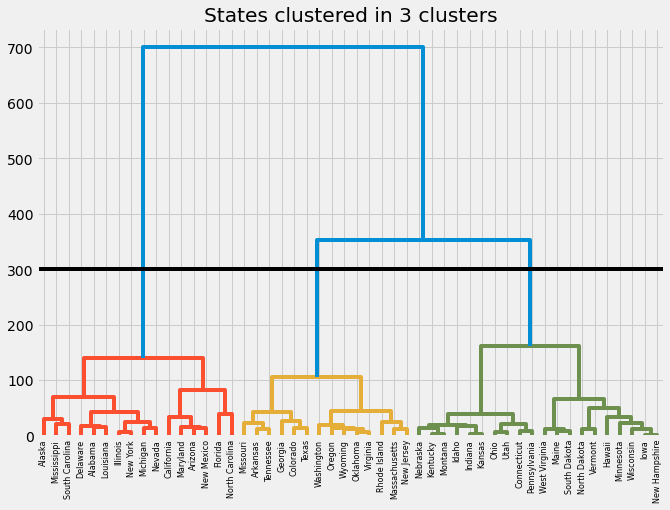

In [4]:
# code here and in additional cells if needed
import scipy.cluster.hierarchy as shc
data = crime.values

plt.figure(figsize=(10, 7))
plt.title("States clustered in 3 clusters")
plt.axhline(y=300, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'),color_threshold=300,labels=crime.index)

#ask

In [28]:
print("By looking through the data, we can observe that the states in the red (high) cluster (ie Alaska) have high crime rates relative to their population (high crime counts)")
print("Meanwhile, states with low crime occurences for their population (ie New Hampshire) fall in the green (low) cluster")
print("Finally, states with relative crime occurences higher than those in green but lower than those in red (ie Texas) fall in the yellow (mid) cluster")

By looking through the data, we can observe that the states in the red (high) cluster (ie Alaska) have high crime rates relative to their population (high crime counts)
Meanwhile, states with low crime occurences for their population (ie New Hampshire) fall in the green (low) cluster
Finally, states with relative crime occurences higher than those in green but lower than those in red (ie Texas) fall in the yellow (mid) cluster


*Write your answer here, replacing this text.*

#### Question 1.2 (Standard units, 5 points)

Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states **after standardizing the four variables.** What effect does standardization have on the clustering obtained? Should the variables be standardized before the clustering? Justify your answer.


In [5]:
# code here and in additional cells if needed
def standard_units(x):
    return (x-np.average(x))/np.std(x,ddof=1)

In [6]:
datanew = pd.DataFrame(
    {"State": crime_df['State'],
     "Murder": standard_units(crime_df.Murder),
     "Assault": standard_units(crime_df.Murder),
     "UrbanPop": standard_units(crime_df.UrbanPop),
     "Rape": standard_units(crime_df.Rape)})
datanew.head(5)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,1.242564,1.242564,-0.520907,-0.003416
1,Alaska,0.507862,0.507862,-1.211764,2.484203
2,Arizona,0.071633,0.071633,0.998980,1.042878
3,Arkansas,0.232349,0.232349,-1.073593,-0.184917
4,California,0.278268,0.278268,1.758923,2.067820


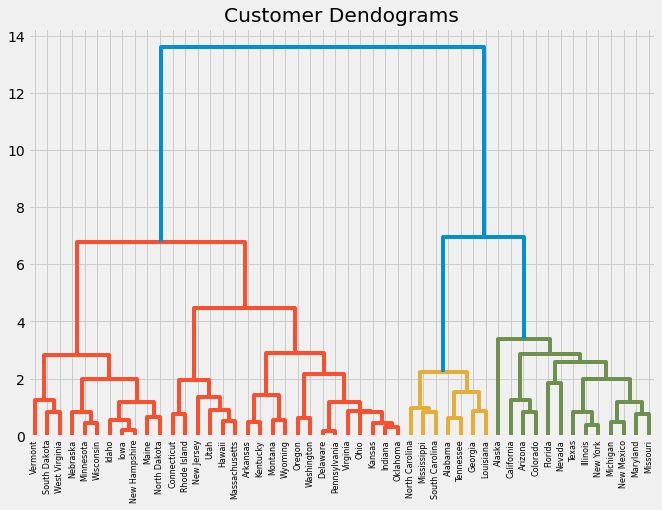

In [7]:
data_new = datanew.set_index('State')
data_new


plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
donk=shc.linkage(data_new, method='ward')
dend = shc.dendrogram(donk,color_threshold=6.9,labels=crime.index)

In [50]:
print("Upon standardizing our data, we observe that our 3 clusters are now vastly different, with one cluster (red) being significantly larger than the other clusters.")
print("In this research, we would want to standardize the 4 variables before clustering as the range of values for each variable would add biased weights that would disrupt the clustering process.")

Upon standardizing our data, we observe that our 3 clusters are now vastly different, with one cluster (red) being significantly larger than the other clusters.
In this research, we would want to standardize the 4 variables before clustering as the range of values for each variable would add biased weights that would disrupt the clustering process.


*Write your answer here, replacing this text.*

#### Question 1.3 (K-means, 5 points)

Perform K-means on the standardized data. The goal here is to determine a reasonable K using the **elbow plot** argument we discussed in class. For K=1,2,...,10 calculate the objective function (sum of squared deviations) at the step where the K-means algorithm converges and plot it against K. Discuss which K you would choose to perform K-means.


In [51]:
from sklearn.cluster import KMeans
from sklearn import datasets
# code here and in additional cells if needed
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_new)
    distortions.append(kmeanModel.inertia_)

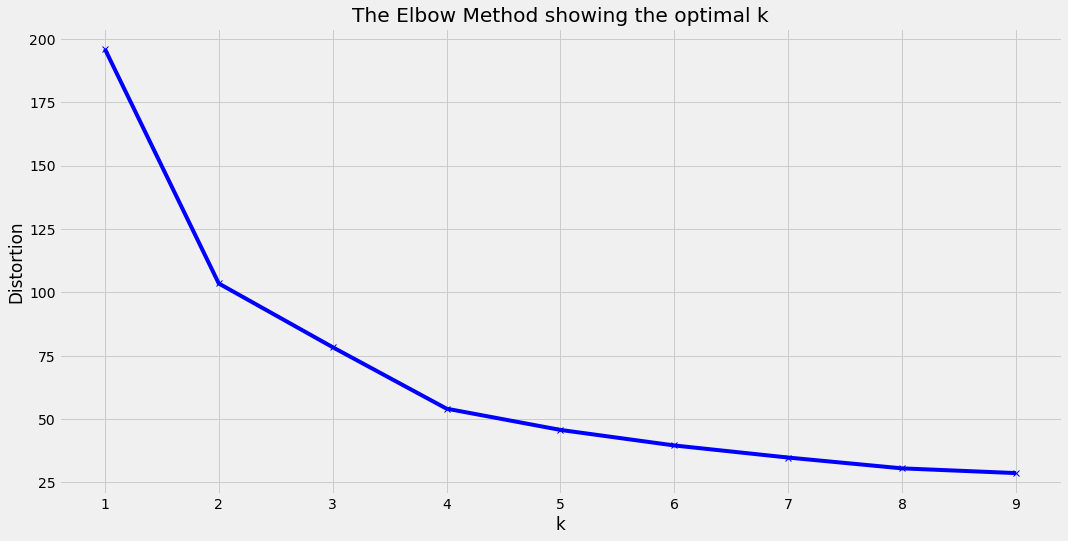

In [52]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
#ask/check-in
print("The elbow appears to be at k=4, because that is the k value after which distortion appears to decline in a linear manner as k increases.")

The elbow appears to be at k=4, because that is the k value after which distortion appears to decline in a linear manner as k increases.


*Write your answer here, replacing this text.*

#### Question 1.4 (K-means clusters, 5 points)

Perform K-means on the standardized data with the K you proposed in Q1.3. How do the clusters compare to what you discovered using hierarchical clustering?


In [83]:
def initialize_centroids(df,K):
    random_ids = np.random.permutation(df.shape[0])
    centroids = df.iloc[random_ids[:K]]
    return centroids
def compute_sse(df, labels, centroids,K):
    distances_ar = np.zeros(df.shape[0])
    for k in range(K):
        point=centroids.iloc[k]        
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[labels == k] = df[labels == k].apply(distance_from_point,axis=1).values
    return np.sum(distances_ar)


def Kmeans(df,K):
    #define the maximum number of iterations
    max_iter=20
    
    #initialize centroids
    centroids=initialize_centroids(df,K)
    
    for i in range(max_iter):
            old_centroids = centroids
            dist_matrix = compute_distance(df, old_centroids)
            clust=np.argmin(dist_matrix, axis=1)
            print(compute_sse(df,clust,old_centroids,K))
            centroids = pd.DataFrame(compute_centroids(df,clust,K))
    
    # return the centroids
    return centroids

def compute_centroids(df, labels, K):
        centroids = np.zeros((K, df.shape[1]))
        for k in range(K):
            centroids[k, :] = df[labels == k].mean()
        return centroids

cent0=Kmeans(data_new,4)
cent0

58.587020301874475
56.408646301746266
55.919526664057464
55.50311497699625
55.447215114783724
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355
55.362856951058355


,0,1,2,3
0,-0.765960,-0.765960,-0.131979,-0.591414
1,0.649151,0.649151,0.940523,1.065874
2,1.303789,1.303789,-0.827954,-0.041377
3,0.507862,0.507862,-1.211764,2.484203


In [84]:
# the Euclidean distance
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))


# calculate distances to centroids
def compute_distance(df, centroids):
    K=centroids.shape[0]
    distances_ar = np.zeros((df.shape[0], K))
    
    # we used a similar approach  in developing kNN

    for k in range(K):
        point=centroids.iloc[k]        
        def distance_from_point(row):
            return distance(point, np.array(row))
        distances_ar[:,k] = df.apply(distance_from_point,axis=1).values
    return distances_ar


dist_matrix=compute_distance(data_new, cent0)
# distances for the first 5 points
dist_matrix[:5,]

array([[2.92666133, 1.9958546 , 0.32127312, 2.78300331],
       [3.72432573, 2.58532822, 2.79157019, 0.        ],
       [2.31367814, 0.81914575, 2.74767463, 2.71023952],
       [1.74502733, 2.44306895, 1.54172252, 2.70094529],
       [3.58160095, 1.3959887 , 3.63923589, 3.01724813]])

In [85]:
clust0=np.argmin(dist_matrix, axis=1)
clust0

array([2, 3, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [86]:
print("Value counts: array 0:", np.count_nonzero(clust0 == 0), ", array 1:", np.count_nonzero(clust0 == 1), ", array 2:", np.count_nonzero(clust0 == 2),", array 3:", np.count_nonzero(clust0 == 3),".")

Value counts: array 0: 27 , array 1: 13 , array 2: 9 , array 3: 1 .


In [8]:
print("Using 4 clusters and K-means method, we observe that there is a significant lean between 2 clusters (clusters 0 and 1), while hierarchical clustering (3 clusters) has more bias towards 1 cluster in that far more than half of the data laid in 1 cluster (cluster red).  Thus, using K-means with k=4, there appears to be more cluster distribution diversity than with hierarchical distribution for 3 clusters.")

Using 4 clusters and K-means method, we observe that there is a significant lean between 2 clusters (clusters 0 and 1), while hierarchical clustering (3 clusters) has more bias towards 1 cluster in that far more than half of the data laid in 1 cluster (cluster red).  Thus, using K-means with k=4, there appears to be more cluster distribution diversity than with hierarchical distribution for 3 clusters.


*Write your answer here, replacing this text.*

## 2. State voting (28 points) 

We look here at how states voted in presidential elections between 1972 and 2020. We would like to identify clusters showing groups of states that vote similarly.

#### Question 2.1 ( Obtaining data , 4 points)

We are asking you to get the data yourself. Specifically, we'd like you to use this table from wikipedia: https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state.

You can convert the table into csv format using this website: https://wikitable2csv.ggor.de/. Simply paste the URL of the article into wikitable2csv and leave the default options as they are. Then click download on Table 1, and you should download a file called table-1.csv. 

Move this file in your working folder and rename it presidential_elections.csv. Then run the cells below to make sure that you did everything properly.

In [10]:
df = pd.read_csv("presidential_elections.csv")
df.shape

(53, 67)

In [11]:
df.head(5) 

,State,1789,1792,1796,1800 †,Unnamed: 5,1804,1808,1812,1816,...,1992,1996,2000 ‡,Unnamed: 60,2004,2008,2012,2016 ‡,2020,State.1
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,NaN,R,R,R,R,R,Alabama
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,NaN,R,R,R,R,R,Alaska
2,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,R,NaN,R,R,R,R,D,Arizona
3,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,D,R,NaN,R,R,R,R,R,Arkansas
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,D,D,NaN,D,D,D,D,D,California


#### Question 2.2 ( Data cleaning, 5 points)

The data in this table is messy. Create a clean version of this table called `df_1972_2020_clean`. It should contain exactly 51 rows (corresponding to the 50 states plus Washington DC) and 13 columns (one for each of the election years from 1972 to 2020).

Also create an array with the state names, `states`, that has length 51 and contains the states in the order corresponding to the rows of the data frame.

Hint. The following panda functions are useful: iloc, drop, rename.

**Notes**: 
- Feel free to open your csv file in Excel or Google Sheets to explore the data if you find that easier. However, we require that you do your actual data cleaning in pandas, i.e. don't just delete and rename columns in Excel.
- In your projects, it is sometimes more convenient to manually do your data cleaning using Excel or other tools. The downside of doing this is that you have no record of what you did, and if you have to redownload the data, you have to redo the manual data cleaning process.

In [12]:
# code here and in additional cells if needed
new = df.dropna(axis=1).drop([25,52]).drop(['1964', '1968'], axis=1)
df_1972_2020_clean=new.drop(["State"], axis=1).set_index('State.1')
df_1972_2020_clean

,1972,1976,1980,1984,1988,1992,1996,2000 ‡,2004,2008,2012,2016 ‡,2020
State.1,,,,,,,,,,,,,
Alabama,R,D,R,R,R,R,R,R,R,R,R,R,R
Alaska,R,R,R,R,R,R,R,R,R,R,R,R,R
Arizona,R,R,R,R,R,R,D,R,R,R,R,R,D
Arkansas,R,D,R,R,R,D,D,R,R,R,R,R,R
California,R,R,R,R,R,D,D,D,D,D,D,D,D
Colorado,R,R,R,R,R,D,R,R,R,D,D,D,D
Connecticut,R,R,R,R,R,D,D,D,D,D,D,D,D
Delaware,R,D,R,R,R,D,D,D,D,D,D,D,D
D.C.,D,D,D,D,D,D,D,D,D,D,D,D,D


In [13]:
states = np.array(new["State"])
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'D.C.', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

#### Question 2.3 ( Numerical results, 4 points)

To perform clustering, we need to convert our data into being numerical. To do this, replace all of the "D" characters with the number 0, and all of the "R" characters with the number 1. Assign the resulting table to `df_1972_2020_numerical`.

In [14]:
# code here and in additional cells if needed
mapping = {"D": 0, "R": 1}

df_1972_2020_numerical=df_1972_2020_clean.replace("R", 1).replace("D", 0)

In [15]:
df_1972_2020_numerical

,1972,1976,1980,1984,1988,1992,1996,2000 ‡,2004,2008,2012,2016 ‡,2020
State.1,,,,,,,,,,,,,
Alabama,1,0,1,1,1,1,1,1,1,1,1,1,1
Alaska,1,1,1,1,1,1,1,1,1,1,1,1,1
Arizona,1,1,1,1,1,1,0,1,1,1,1,1,0
Arkansas,1,0,1,1,1,0,0,1,1,1,1,1,1
California,1,1,1,1,1,0,0,0,0,0,0,0,0
Colorado,1,1,1,1,1,0,1,1,1,0,0,0,0
Connecticut,1,1,1,1,1,0,0,0,0,0,0,0,0
Delaware,1,0,1,1,1,0,0,0,0,0,0,0,0
D.C.,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Question 2.4 (Similar states , 5 points)

As you might expect, some states voted exactly alike in these elections. This question asks you to find:
1. The list of states that voted only Republican over this time period.
2. The list of states that voted only Democratic over this time period.
3. The list of states that voted exactly the same as Illinois over this time period.

Comment briefly on your findings (were you surprised by the IL list?).


In [16]:
# code here and in additional cells if needed
for j in range(df_1972_2020_numerical.shape[0]):
    if df_1972_2020_numerical.iat[j,0]==df_1972_2020_numerical.iat[j,1]==df_1972_2020_numerical.iat[j,2]==df_1972_2020_numerical.iat[j,3]==df_1972_2020_numerical.iat[j,4]==df_1972_2020_numerical.iat[j,5]==df_1972_2020_numerical.iat[j,6]==df_1972_2020_numerical.iat[j,7]==df_1972_2020_numerical.iat[j,8]==df_1972_2020_numerical.iat[j,9]==df_1972_2020_numerical.iat[j,10]==df_1972_2020_numerical.iat[j,11]==df_1972_2020_numerical.iat[j,12]==1:
        print(states[j])
print("are the states that have always voted Republican in this time period.  This doesn't appear to be too surprising, since these states are culturally known to be Republican-leaning.")
#add comment here

Alaska
Idaho
Kansas
Nebraska
North Dakota
Oklahoma
South Dakota
Utah
Wyoming
are the states that have always voted Republican in this time period.  This doesn't appear to be too surprising, since these states are culturally known to be Republican-leaning.


In [17]:
for j in range(df_1972_2020_numerical.shape[0]):
    if df_1972_2020_numerical.iat[j,0]==df_1972_2020_numerical.iat[j,1]==df_1972_2020_numerical.iat[j,2]==df_1972_2020_numerical.iat[j,3]==df_1972_2020_numerical.iat[j,4]==df_1972_2020_numerical.iat[j,5]==df_1972_2020_numerical.iat[j,6]==df_1972_2020_numerical.iat[j,7]==df_1972_2020_numerical.iat[j,8]==df_1972_2020_numerical.iat[j,9]==df_1972_2020_numerical.iat[j,10]==df_1972_2020_numerical.iat[j,11]==df_1972_2020_numerical.iat[j,12]==0:
        print(states[j]) 
print("are the states that have always voted Democrat in this time period.")
print("I'm surprised that DC is the only state that has always voted Democrat.  Then again, I remember that Reagan was immensely charistmatic and practically won the 1984 election by a landslide, meaning there would only be very few states that never voted Republican.")

D.C.
are the states that have always voted Democrat in this time period.
I'm surprised that DC is the only state that has always voted Democrat.  Then again, I remember that Reagan was immensely charistmatic and practically won the 1984 election by a landslide, meaning there would only be very few states that never voted Republican.


In [18]:
for i in range(len(df_1972_2020_numerical)):
    if df_1972_2020_numerical.iloc[i].equals(df_1972_2020_numerical.iloc[13]) == True:
        print(states[i])
print("are the states that has voted the same way as Illinois from 1972 to 2020.  I am personally surprised that there would be this many states that voted the same as Illinois.")

California
Connecticut
Illinois
Maine
New Jersey
Vermont
are the states that has voted the same way as Illinois from 1972 to 2020.  I am personally surprised that there would be this many states that voted the same as Illinois.


*Write your answer here, replacing this text.*

#### Question 2.5 ( State clustering, 10 points)

You are asked here to cluster states according to their voting record and write a short description of your findings. 

You need to decide on the method of clustering and on the best way to present your results. 

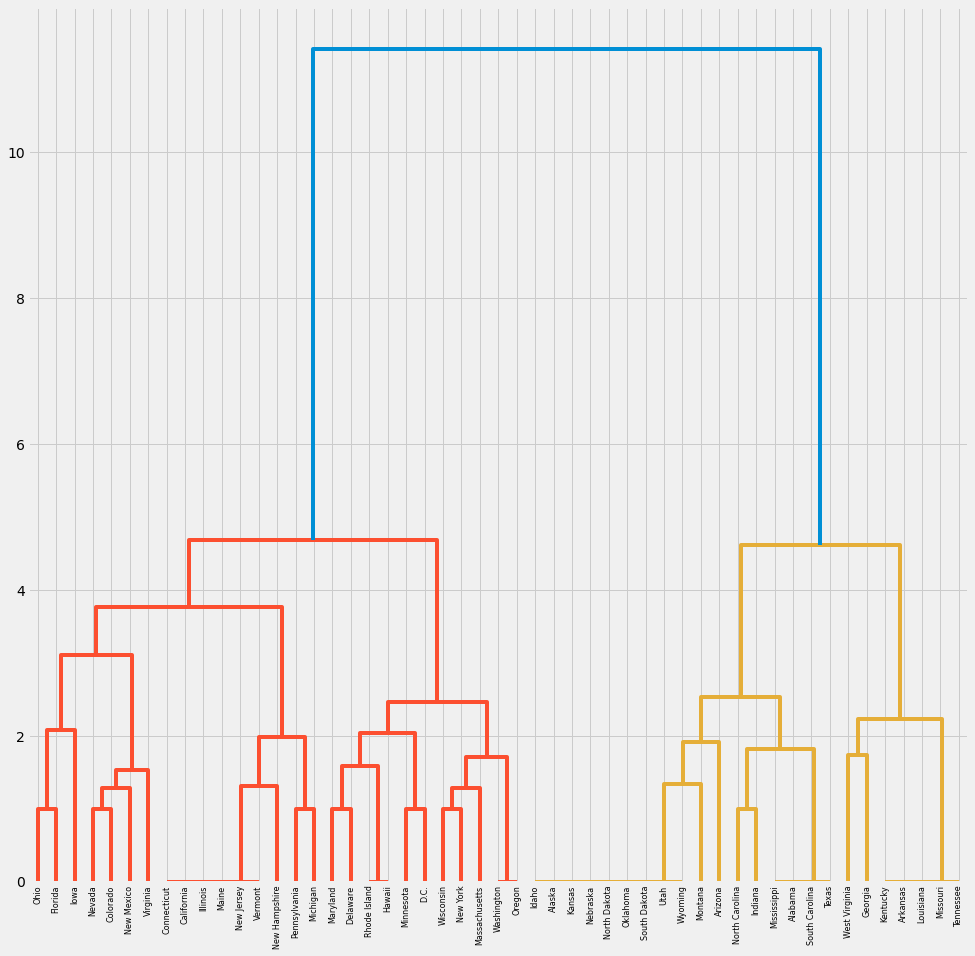

In [20]:
# code here and in additional cells if needed
plt.figure(figsize=(15, 15))
donk=shc.linkage(df_1972_2020_numerical, method='ward')
dend = shc.dendrogram(donk,labels=df_1972_2020_numerical.index, distance_sort='descending',leaf_font_size=8)

*Write your answer here, replacing this text.*

In [21]:
#Findings
print("We observe that the states can be clustered in terms of their exact voting patterns from 1972 to 2020, with flat lines indicating that states on said lines voted the exact same way from 1972 to 2020.")
print("It is interesting to observe both a mixture of clusters of states that voted the exact same way, as well as a number of states (ie Indiana, DC) that voted uniquely.")
print("We don't need to standardize this data given its binary nature.")
print("The above clustering also indicates that we can create 2 clusters: one of states that leaned more republican (yellow) and one of states that leaned more democrat (red)")

We observe that the states can be clustered in terms of their exact voting patterns from 1972 to 2020, with flat lines indicating that states on said lines voted the exact same way from 1972 to 2020.
It is interesting to observe both a mixture of clusters of states that voted the exact same way, as well as a number of states (ie Indiana, DC) that voted uniquely.
We don't need to standardize this data given its binary nature.
The above clustering also indicates that we can create 2 clusters: one of states that leaned more republican (yellow) and one of states that leaned more democrat (red)
